In [100]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 16)

In [2]:

%cd ~/JupyStuff/GameDataPractice
%ls

/Users/sunehapruthy/JupyStuff/GameDataPractice
VideoGameSales.ipynb  vgsales.csv*


In [3]:
#read the data and see the dimension
data = pd.read_csv('vgsales.csv')
print ('The dimension of the data is: ', data.shape)

The dimension of the data is:  (16598, 11)


In [35]:
#we see that the data is 16598 entries, now to see the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
data.describe(include='O')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


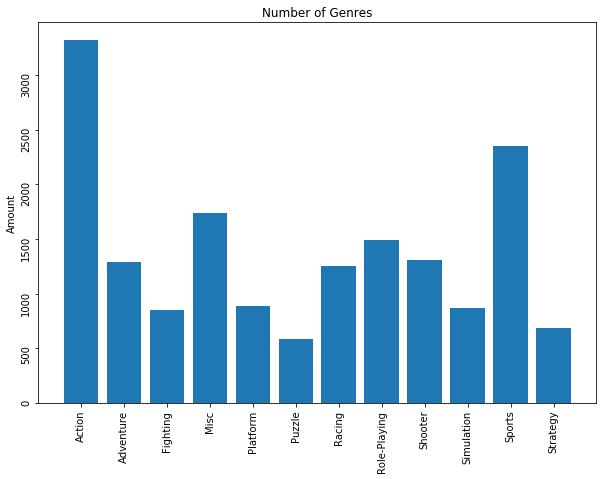

In [7]:
#plot how many Genres there are
plt.rcParams['figure.figsize']=(10,7)

X = data.groupby('Genre').size().reset_index(name='counts')['Genre']
Y = data.groupby('Genre').size().reset_index(name='Counts')['Counts']


plt.bar(X,Y)
plt.title("Number of Genres")
plt.ylabel("Amount")
plt.tick_params(axis='both', labelsize=10, labelrotation=90)

The most genres in the data throughout is Action, while the second most is Sports

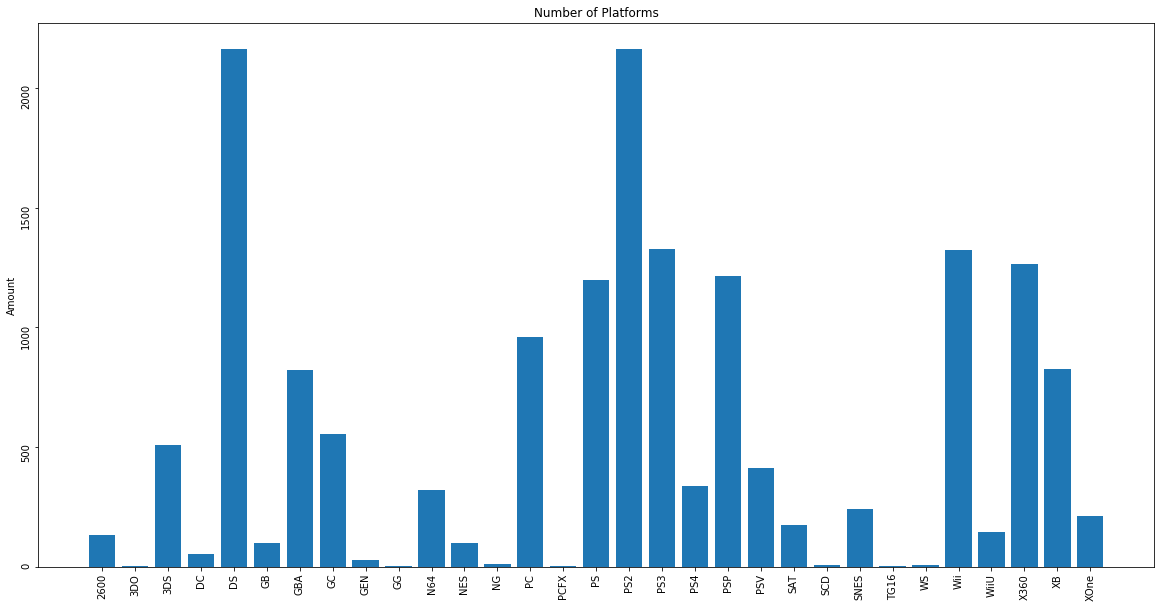

In [8]:
#plot how many Platforms
plt.rcParams['figure.figsize']=(20,10)

X = data.groupby('Platform').size().reset_index(name='counts')['Platform']
Y = data.groupby('Platform').size().reset_index(name='Counts')['Counts']


plt.bar(X,Y)
plt.title("Number of Platforms")
plt.ylabel("Amount")
plt.tick_params(axis='both', labelsize=10, labelrotation=90)

The most platforms in this data is DS and the next being PS2, both of which are now discontinued/replaced. 

In [108]:
#looking at the Genre set and doing some calculations 
print(set(data['Genre']))
print(data['Genre'][2])
print(data['NA_Sales'][2])
print(np.sum(data['NA_Sales'][data["Genre"] == "Action"]))

{'Shooter', 'Strategy', 'Racing', 'Simulation', 'Role-Playing', 'Misc', 'Fighting', 'Sports', 'Puzzle', 'Action', 'Platform', 'Adventure'}
Racing
15.85
861.7700000000001


Now to do some sales plotting: <br>

Based on the game genre, subplots are made to show each country's sales.
The subplots are:
<br>
<br>
Genre, NA_Sales
Genre, EU_Sales
Genre, JP_Sales
Genre, Other_Sales;
<br>
<br>
represented by: z, y, x, w and z2, y2, x2, w2

In [11]:
#first group by Genre so we can plot by Genre. Then see describe() and focus on NA_Sales. we can get the sales
#amount total of games for each genre
gk = data.groupby('Genre')
z = gk.describe()['NA_Sales']
z2 = z['count']*z['mean']
print(z,'\n')
print(z2)

               count      mean       std  min   25%   50%   75%    max
Genre                                                                 
Action        3316.0  0.264726  0.566890  0.0  0.02  0.10  0.26   9.63
Adventure     1286.0  0.082271  0.274674  0.0  0.00  0.00  0.07   6.16
Fighting       848.0  0.263667  0.516148  0.0  0.00  0.08  0.29   6.75
Misc          1739.0  0.235906  0.690878  0.0  0.00  0.08  0.21  14.97
Platform       886.0  0.504571  1.502039  0.0  0.05  0.14  0.44  29.08
Puzzle         582.0  0.212680  1.057669  0.0  0.01  0.05  0.14  23.20
Racing        1249.0  0.287766  0.742523  0.0  0.03  0.10  0.27  15.85
Role-Playing  1488.0  0.219946  0.672721  0.0  0.00  0.04  0.16  11.27
Shooter       1310.0  0.444733  1.201147  0.0  0.03  0.12  0.37  26.93
Simulation     867.0  0.211430  0.466698  0.0  0.00  0.07  0.24   9.07
Sports        2346.0  0.291283  1.041024  0.0  0.02  0.11  0.30  41.49
Strategy       681.0  0.100881  0.298956  0.0  0.00  0.00  0.08   3.18 

Genr

$$\bar{X} = \frac{X_1 + X_2 + \dots + X_N}{N} \cdot N = ? $$

In [12]:
#now for the other sale markets
y = gk.describe()['EU_Sales']
y2 = y['count']*y['mean']

x = gk.describe()['JP_Sales']
x2 = x['count']*x['mean']

w = gk.describe()['Other_Sales']
w2 = w['count']*w['mean']

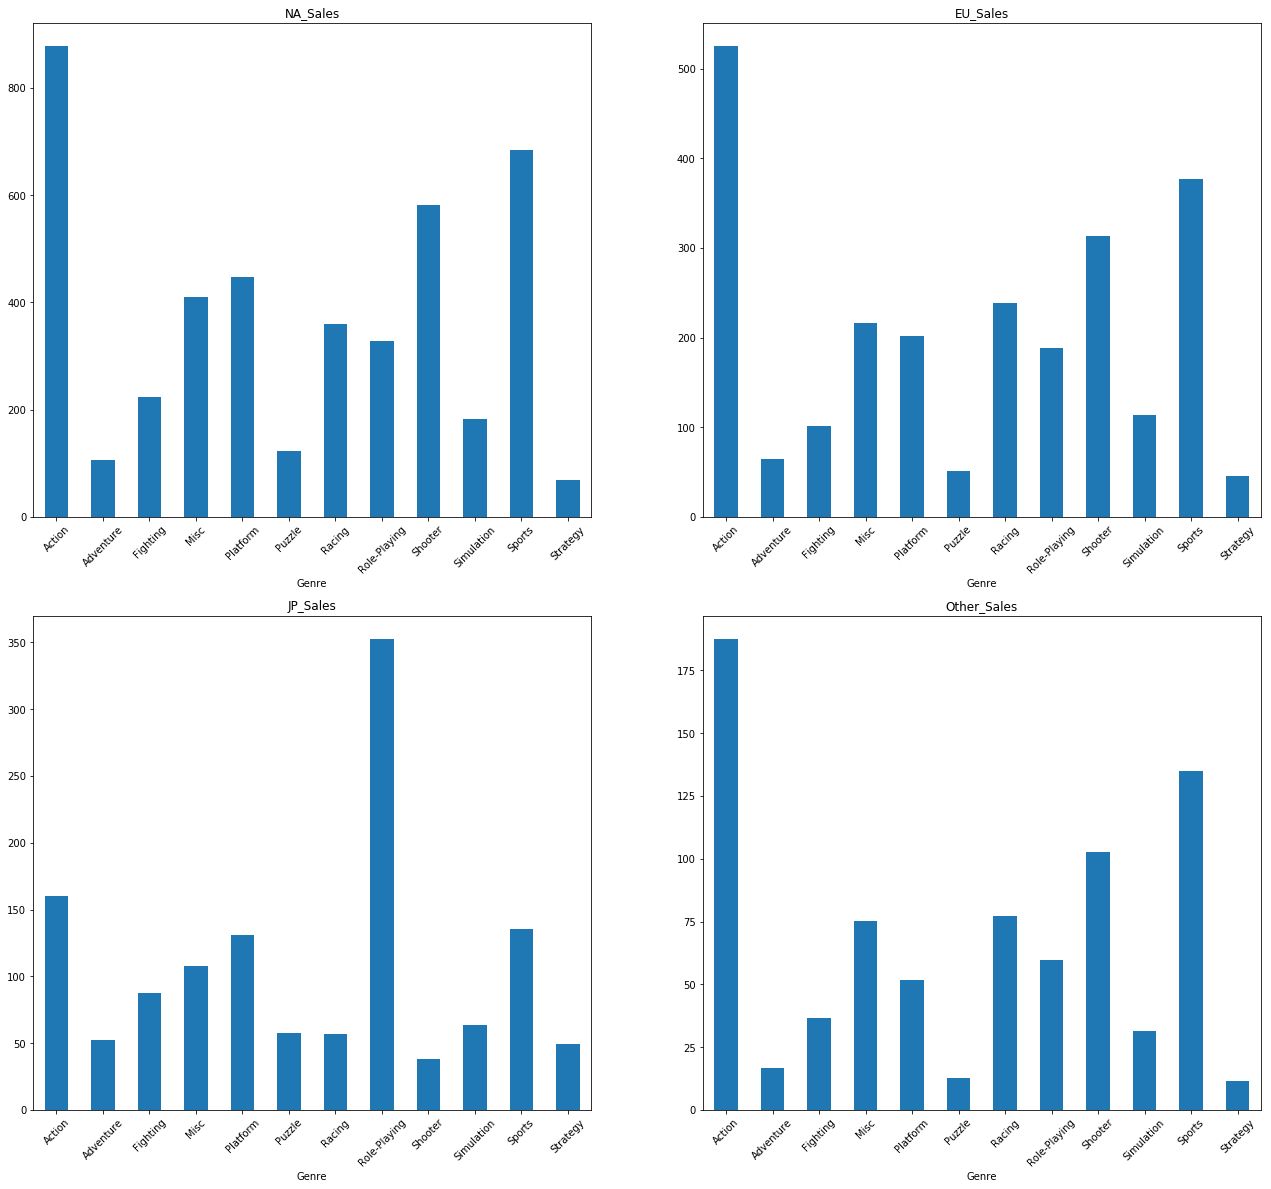

In [13]:
#time to plot; bar graphs so it's easier to see
plt.rcParams['figure.figsize']=(22,20)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
z2.plot.bar(ax=axes[0,0], title = 'NA_Sales', rot=45)
y2.plot.bar(ax=axes[0,1], title = 'EU_Sales', rot=45)
x2.plot.bar(ax=axes[1,0], title = 'JP_Sales', rot=45)
w2.plot.bar(ax=axes[1,1], title = 'Other_Sales', rot=45)

With the bar graphs, NA, EU, and Other mostly look the same, with Action being the most sold, followed by Sports. <br>
However, with JP, Role-Playing, or RPG, is the most sold. Now to graph Global and see the overall results

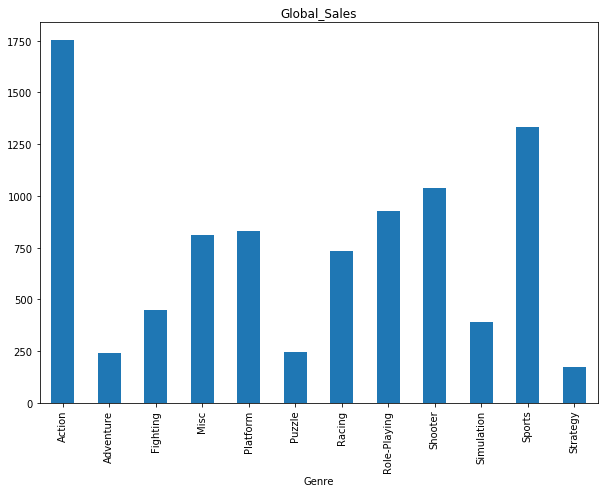

In [14]:
plt.rcParams['figure.figsize'] = (10,7)
globalgenre = gk.describe()['Global_Sales']
globalgenre2 = globalgenre['count']*globalgenre['mean']
globalgenre2.plot.bar(title = 'Global_Sales')

Global Sales more or less looks like NA, EU, and Other since those are most popular. <br>
Because of this, looking at how correlated NA, EU, JP, and Other are would be a good idea

/Users/sunehapruthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


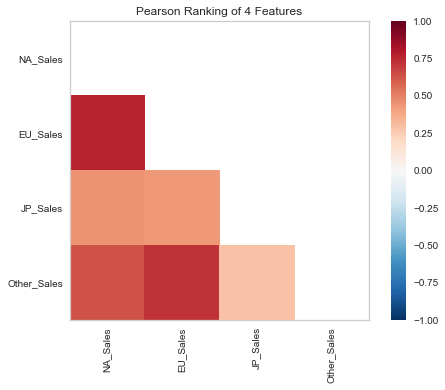

In [15]:
num_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.rcParams['figure.figsize'] = (15,7)
from yellowbrick.features import Rank2D
X = data[num_features].as_matrix()
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)
visualizer.transform(X)
visualizer.poof()

Based on the Pearson correlation, NA and EU, EU and Other, as well as NA and Other are very correlated. JP is the only market where there is less correlation. Thus, looking into JP is an interesting market to look at.

Before looking into JP Sales, where we will see how well RPG sells in Japan since it's the most popular Genre sold there, lets look at Platform Sales for each market

In [16]:
print(set(data['Platform']))

{'PSV', 'N64', 'GG', 'GBA', 'PS4', 'XOne', 'Wii', '2600', 'GEN', '3DS', 'NES', 'SCD', 'GC', 'PS', 'PSP', 'DS', 'PS2', 'DC', 'WiiU', 'PCFX', 'XB', 'GB', '3DO', 'X360', 'SNES', 'PS3', 'PC', 'NG', 'TG16', 'SAT', 'WS'}


Now to see Sales by Platform <br>
p, q, r, and s will be NA, EU, JP, and Other respectively. <br>

In [17]:
pk = data.groupby('Platform')

p = pk.describe()['NA_Sales']
p2 = p['count']*p['mean']

q = pk.describe()['EU_Sales']
q2 = q['count']*q['mean']

r = pk.describe()['JP_Sales']
r2 = r['count']*r['mean']

s = pk.describe()['Other_Sales']
s2 = s['count']*s['mean']

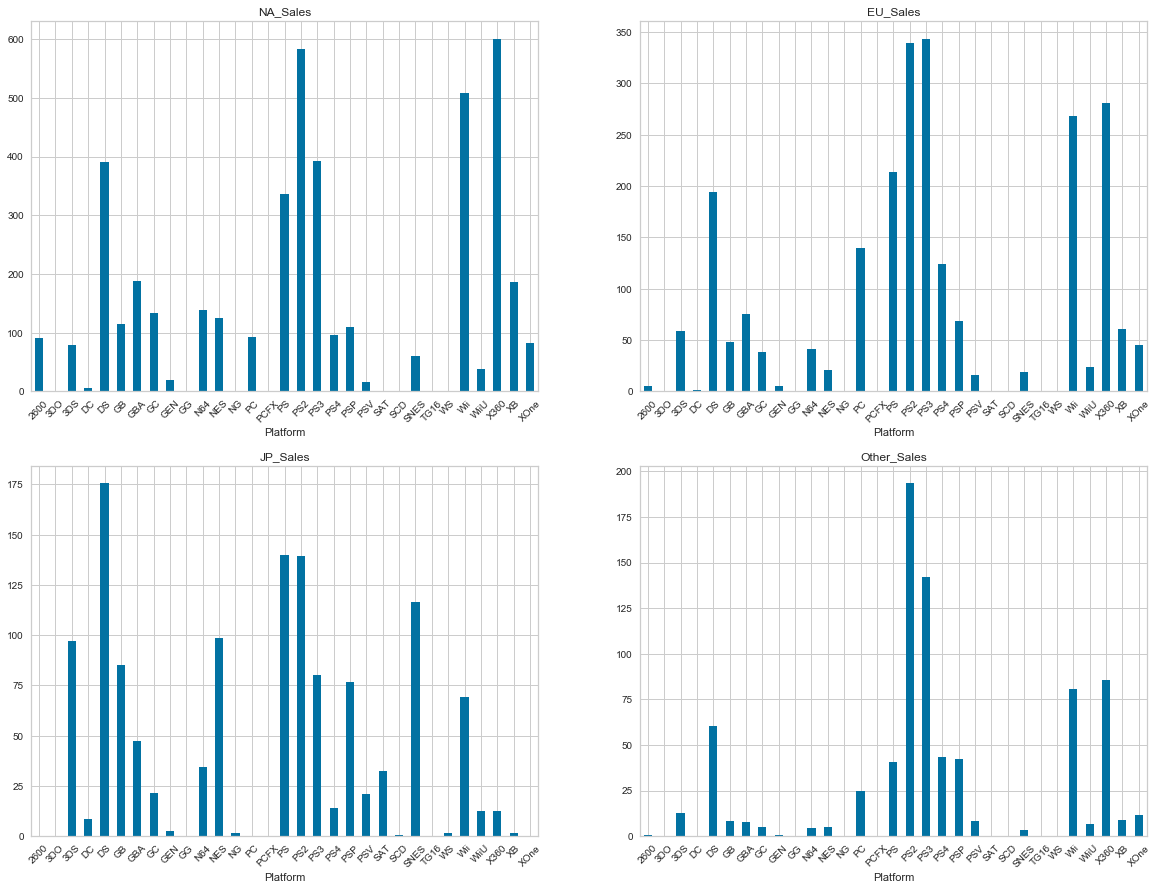

In [18]:
plt.rcParams['figure.figsize'] = (20,15)
fig, axes = plt.subplots(nrows=2, ncols=2)
p2.plot.bar(ax=axes[0,0], title='NA_Sales',rot=45)
q2.plot.bar(ax=axes[0,1], title='EU_Sales',rot=45)
r2.plot.bar(ax=axes[1,0], title='JP_Sales',rot=45)
s2.plot.bar(ax=axes[1,1], title='Other_Sales',rot=45)

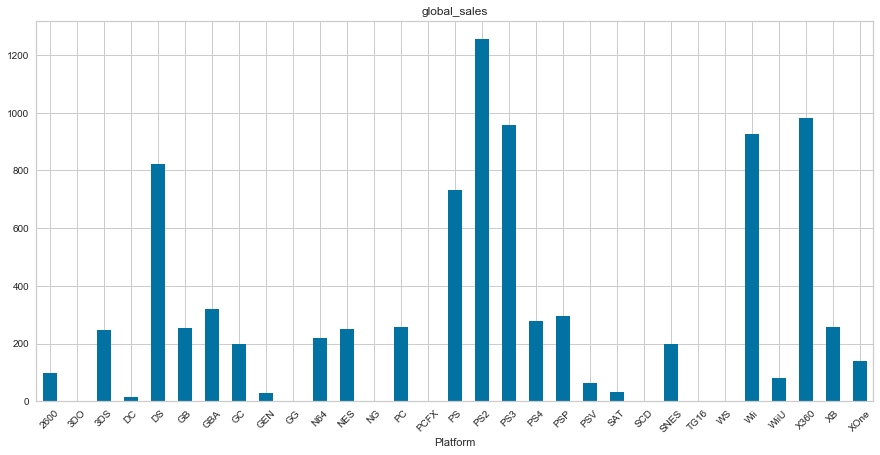

In [19]:
plt.rcParams['figure.figsize'] = (15,7)
globalplatform=pk.describe()['Global_Sales']
globalplatform2=globalplatform['count']*globalplatform['mean']
globalplatform2.plot.bar(title='global_sales', rot=45)

We can see that in NA, Xbox360 and PS2 are the most sold while in the EU, its PS2 and PS3.
JP is mostly DS and Other is PS2. <br>
It is obvious that these models are out of date now, but in their prime, PS2 is overall most popular in the NA, EU, and Other markets, while in JP, DS has the highest sales with Ps and PS2 falling quite behind. <br>
Once again, JP looks like an interesting market to look furthur into. 

Before moving furthur, some of this data needs to be cleaned up. First, theres a game that has a year value of 2020, even though it was released in 2009. TIme to locate and fix that.

In [20]:
data[data['Year']==2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [21]:
data['Year'].idxmax()

5957

In [22]:
data['Year'].min()

1980.0

In [23]:
data.loc[5957]

Rank                              5959
Name            Imagine: Makeup Artist
Platform                            DS
Year                              2020
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                             0
JP_Sales                             0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5957, dtype: object

In [24]:
#fix the year for this game b/c it's wrong

data['Year'].set_value(5957, 2009)

/Users/sunehapruthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
5        1989.0
6        2006.0
7        2006.0
          ...  
16590    2007.0
16591    2004.0
16592    2008.0
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [25]:
data.loc[5957]

Rank                              5959
Name            Imagine: Makeup Artist
Platform                            DS
Year                              2009
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                             0
JP_Sales                             0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5957, dtype: object

Now the max vaue of the Year column is 2017. Which isn't consistant since our data is supposed to go to October or 2016. But, since the sales are only in JP and JP tends to release games ahead of NA and EU, it can still be included. There's only 3 games that fit this condition anyway.

In [26]:
data['Year'].max()

2017.0

In [27]:
data[data['Year']==2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


The dataset also has some NaN values, which aren't really counted in caculations, but are annoying since they count toward the total number of entries there are. So removing them would be helpful.

In [28]:
#drop NaN missing values cuz they are annoying
data.dropna(inplace=True)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [29]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.404886,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.831475,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Now that the rows that had missing data are removed, time to look at the RPG Genre since it looked interesting before. <br>
Below is a data set made to only contain games that are RPGs

In [41]:
dfRPG = data[data['Genre']=='Role-Playing']
dfRPG.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32


In [53]:
dfRPG.describe(include='O')

,Name,Platform,Genre,Publisher
count,1470,1470,1470,1470
unique,1206,26,1,158
top,Marvel: Ultimate Alliance 2,DS,Role-Playing,Namco Bandai Games
freq,6,196,1470,151


In [31]:
print(set(data['Year']))

{1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0}


In [34]:
RPGbyYear = dfRPG.sort_values(by='Year')
RPGbyYear.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
611,612,Dragon Warrior,NES,1986.0,Role-Playing,Capcom,0.49,0.0,0.52,1.51,2.52
2466,2468,Final Fantasy,NES,1987.0,Role-Playing,SquareSoft,0.32,0.0,0.52,0.00,0.84
1588,1590,Gegege no Kitarou 2: Youkai Gundan no Chousen,NES,1987.0,Role-Playing,Namco Bandai Games,0.00,0.0,1.25,0.00,1.25
602,603,Dragon Warrior II,NES,1987.0,Role-Playing,Enix Corporation,0.15,0.0,2.41,0.00,2.56
1587,1589,Dragon Ball: Daimaou Fukkatsu,NES,1988.0,Role-Playing,Namco Bandai Games,0.00,0.0,1.25,0.00,1.25


Sorting the data above was jsut for visual benefit, but graphing the sales of RPGs in Japan is below. We can see in the graph below that even though sales of RPG games increased over the years, after 2008, RPG sales died down quite a bit. New data would be needed to furthur see if sales still go down but time to look at a regression just to see how bad it is.

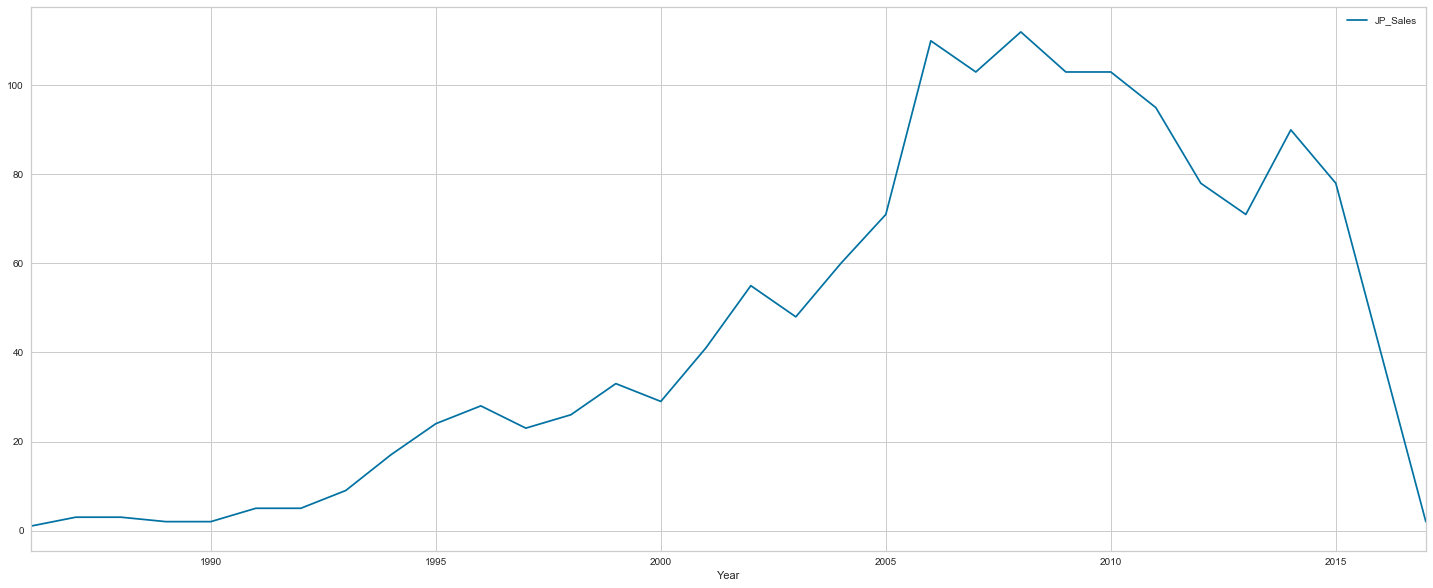

In [95]:
plt.rcParams['figure.figsize'] = (25,10)
RPGbyYear.groupby('Year').agg('count').plot(y ='JP_Sales', kind='line')

Because the data above looks a tad bit exponential before dying down, taking the log of the data might help see a bigger picture. 

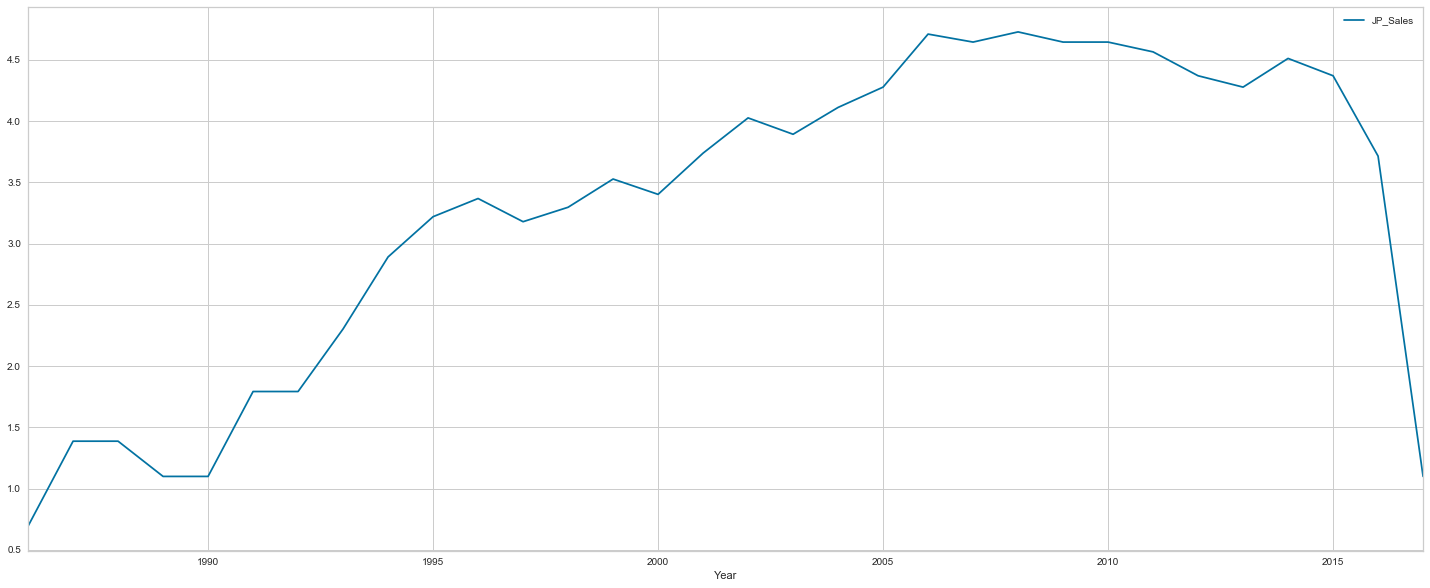

In [99]:
log=RPGbyYear.groupby('Year').agg('count')
log2 = log.apply(np.log1p)
log2.plot(y='JP_Sales',kind='line')

Seeing the log of the graph doesn't really tell much so time to see a regression plot.

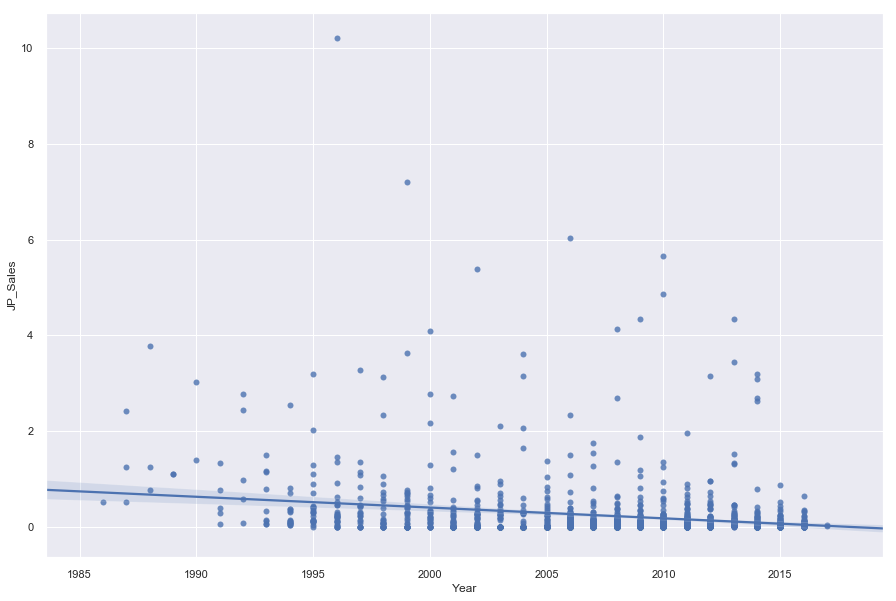

In [107]:
plt.rcParams['figure.figsize'] = (15,10)
sns.set(color_codes=True)
ax = sns.regplot(x='Year',y='JP_Sales', data=RPGbyYear, fit_reg=True)

Based on the regression plot, the decreasing line of best fit tells us that sales are decreasing as the years go by. Perhaps RPG games on platforms arent as popular now? The mobile game market has really skyrocketed over  the years, especially in the RPG Genre, perhaps with more data collection with mobile games included, the sales would be at an increasing rate rather than decreasing.

In [79]:
#dfRPG.groupby(by='Publisher',as_index=False).agg({'Genre':pd.Series.nunique})

#not what I wanted oops

For fun, let's see how many genres each publisher has. Since there's so much data, let's only look at the ones that make more than 40 RPGs

In [83]:
dfRPG.groupby('Publisher').count()[['Genre']]

,Genre
Publisher,
1C Company,1
3DO,1
505 Games,10
5pb,1
ASCII Entertainment,3
ASCII Media Works,2
Acclaim Entertainment,1
Ackkstudios,2
...,...


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

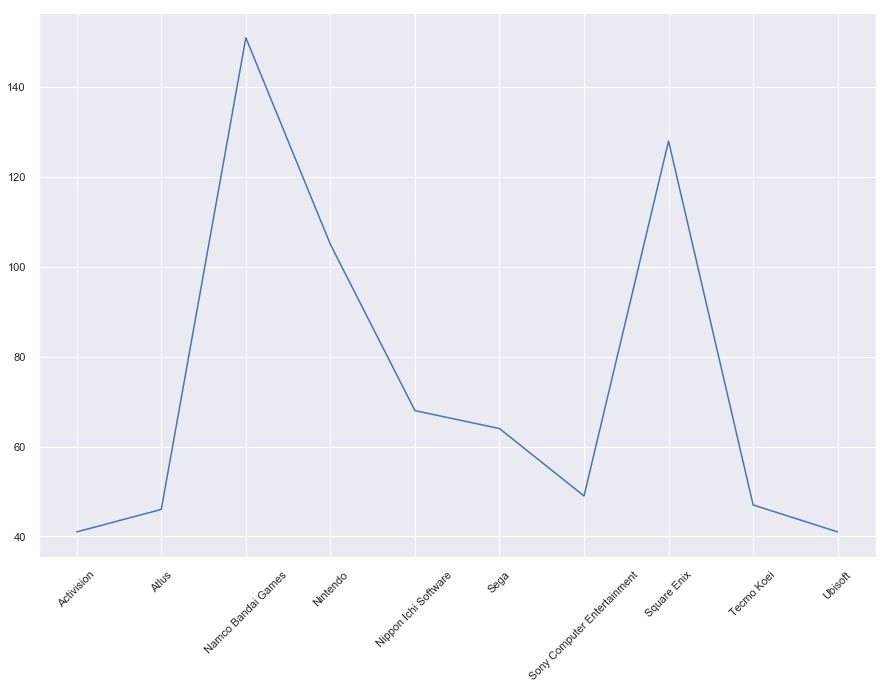

In [122]:
temp = dfRPG.groupby('Publisher').count()[['Genre']]
plt.plot(temp[temp['Genre'] > 40])
plt.xticks(rotation=45)

Based on the line graph, Bandai and Square Enix make the most RPG games.